<a href="https://colab.research.google.com/github/acallah2/acallah2.github.io/blob/main/Copy_of_%E2%80%9CUCD_EEC151_FQ2025_CA1%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# UCD EEC 151
# Computer Assignment 1
#
# Convolution.
#
# IMPORTS
import numpy as np
import scipy as sp
import scipy.signal as sps
import matplotlib.pyplot as plt

Part 1.  Convolution.

Consider a system which is going to process an input signal composed of relatively long pulses.  

This system is the first-order difference (or "backwards difference") system, $y[n]=x[n] - x[n-1]$ .  

Its impulse response is $h[n] = \delta[n] - \delta[n-1]$.

The input signal has long strings of 0 followed by pulses of amplitude 1, which go on and off repeatedly.

A simple signal with two such pulses is shown in the figure below.



[Text(0.5, 1.0, 'y = convolve(h,s)')]

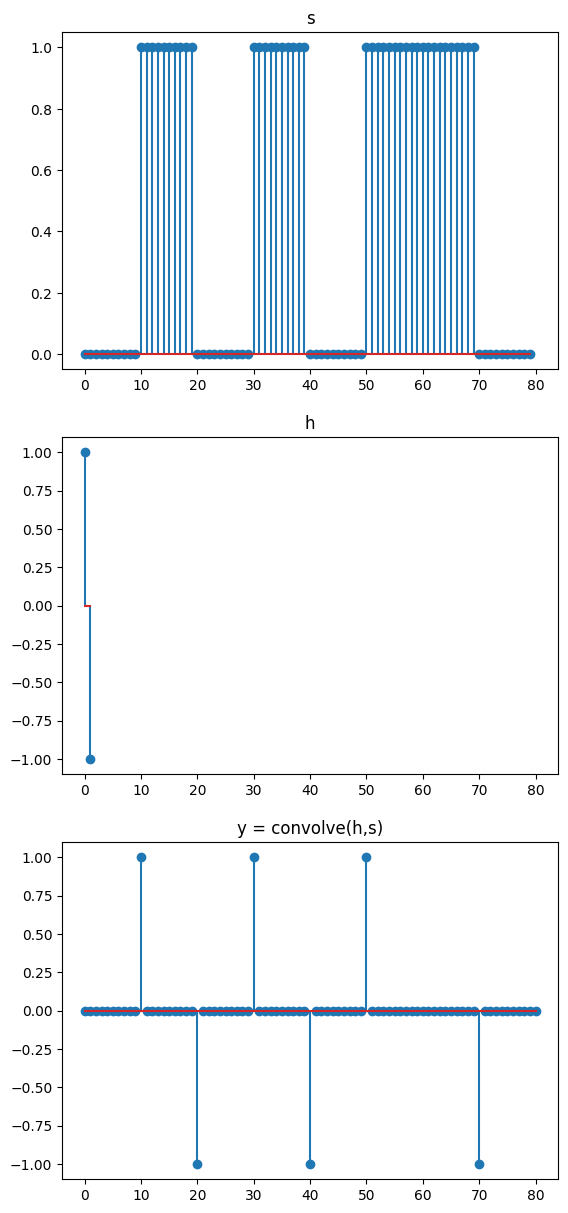

In [ ]:
# s is an input signal with some zeros, a 1-"pulse", zeros, and another pulse.
# h = [1 -1] # backwards difference system
# compute y = sps.convolve(h,s) # this is like the function conv() in MATLAB
# plot the results

s = np.zeros(80)
s[10:20] = 1.0
s[30:40] = 1.0
s[50:70] = 1.0

h = np.array([1, -1])

y = sps.convolve(h,s)

f = plt.figure()
plt.subplots_adjust(top=2.5)

ax1 = f.add_subplot(3,1,1)
ax1.stem(s)
ax1.set(title="s")

ax2 = f.add_subplot(3,1,2,sharex=ax1)
ax2.stem(h)
ax2.set(title="h")

ax3 = f.add_subplot(3,1,3,sharex=ax1)
ax3.stem(y)
ax3.set(title="y = convolve(h,s)")



Part 2. Denoising via convolution

In real data, a clean signal is often corrupted by noise. We’ll reduce noise with a small smoothing filter. For the following example, we consider a length-M moving-average kernel: h = 1/M [1,1,...,1], whose weights sum to 1, acting a lowpass smoother that supperesses high-frequency noise while preserving low-frequency components. Another choice can be a Gaussian kernel in Part B.


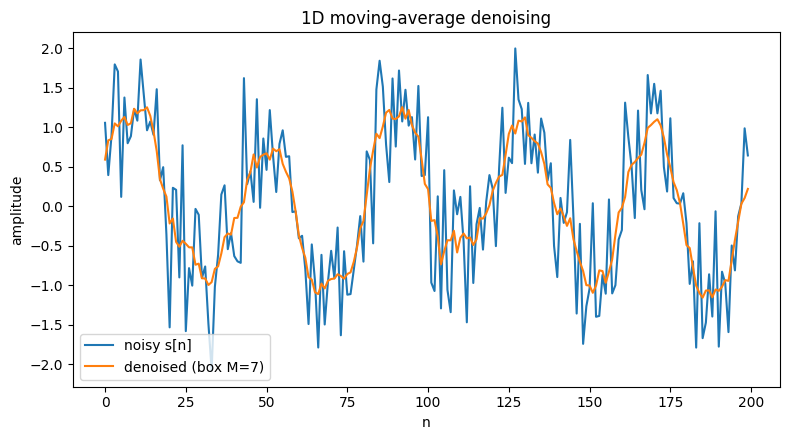

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sps

# Random seed and signal length
np.random.seed(0)
N = 200
n = np.arange(N)

# Construct a simple clean signal + noise
s_clean = np.sin(2*np.pi*n/40)      # single sinusoid (basic example)
noise = 0.6*np.random.randn(N)      # Gaussian white noise
s = s_clean + noise                  # noisy signal

# Basic smoothing kernel: length-M moving average (sums to 1)
M = 7
h = np.ones(M, dtype=float) / M

# 1-D convolution for denoising (mode="same" keeps the original length)
y = sps.convolve(s, h, mode="same")

# Plot comparison: noisy vs. denoised
plt.figure(figsize=(8, 4.5))
plt.plot(n, s, label="noisy s[n]")
plt.plot(n, y, label=f"denoised (box M={M})")
plt.title("1D moving-average denoising")
plt.xlabel("n")
plt.ylabel("amplitude")
plt.legend()
plt.tight_layout()
plt.show()


You can find nosiy and clean star image with the link: https://drive.google.com/drive/folders/1QH9qYYsJt962ApCKq52WRrbPg--kI3D7?usp=sharing. Now please save the star images in your Google Drive.

In [ ]:
# Colab-ready script: load clean/noisy star images from Google Drive, resize to 100x100, display, and save standardized copies.

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import drive
import os

# 1) Mount Google Drive
drive.mount('/content/drive')

# 2) Set paths in Drive
# Replace FOLDER with the folder in your Drive where the images live.
# If your files are directly in "MyDrive", set FOLDER = "" and adjust paths accordingly.
FOLDER = "star_images"   # e.g., "star_images" or "" if in root of MyDrive
BASE = "/content/drive/MyDrive" if FOLDER == "" else f"/content/drive/MyDrive/{FOLDER}"

# Expected filenames (change if your names differ)
clean_name = "star_clean.png"
noisy_name = "star_noisy_gauss.png"

clean_path = os.path.join(BASE, clean_name)
noisy_path = os.path.join(BASE, noisy_name)

# 3) Helper to load as grayscale array, optionally resize to 100x100
def load_gray(path, size=(100, 100)):
    img = Image.open(path).convert("L")             # grayscale (0–255)
    if size is not None:
        img = img.resize(size, resample=Image.BILINEAR)
    arr = np.asarray(img, dtype=np.uint8)
    return img, arr

# 4) Load images
if not os.path.exists(clean_path):
    raise FileNotFoundError(f"Clean image not found: {clean_path}")
if not os.path.exists(noisy_path):
    raise FileNotFoundError(f"Noisy image not found: {noisy_path}")

img_clean, arr_clean = load_gray(clean_path, size=(100, 100))
img_noisy, arr_noisy = load_gray(noisy_path, size=(100, 100))

print("Clean shape:", arr_clean.shape, "dtype:", arr_clean.dtype, "range:", (arr_clean.min(), arr_clean.max()))
print("Noisy shape:", arr_noisy.shape, "dtype:", arr_noisy.dtype, "range:", (arr_noisy.min(), arr_noisy.max()))

# 5) Display
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(arr_clean, cmap="gray", vmin=0, vmax=255)
plt.title("Clean (100×100)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(arr_noisy, cmap="gray", vmin=0, vmax=255)
plt.title("Noisy (100×100)")
plt.axis("off")

plt.tight_layout()
plt.show()

# 6) Save standardized 100×100 copies back to Drive (optional)
std_dir = os.path.join(BASE, "standardized_100x100")
os.makedirs(std_dir, exist_ok=True)
std_clean_path = os.path.join(std_dir, "star_clean_100x100.png")
std_noisy_path = os.path.join(std_dir, "star_noisy_gauss_100x100.png")
Image.fromarray(arr_clean).save(std_clean_path)
Image.fromarray(arr_noisy).save(std_noisy_path)
print("Saved:", std_clean_path)
print("Saved:", std_noisy_path)


Mounted at /content/drive


FileNotFoundError: Clean image not found: /content/drive/MyDrive/star_images/star_clean.png

# ***Part A***

Now for the part where you add code! Apply a length-7 moving-average kernel—first across rows, then on the result across columns.



In [ ]:
temp_output_1 = np.zeros((arr_noisy.shape)) # store convolutions by rows
temp_output_2 = np.zeros((arr_noisy.shape)) # store convolutions by columns

# ADD CODE HERE - compute convolutions by row, then by column, then combine (10 points)
# (1) run each row of the original input image through denoiser convolution

# (2) run each column of the ROW-FILTERED image through denoiser convolution

# (3) final separable 2D result is temp_output_2

# ADD PLOTTING CODE HERE (5 points)
# note: add short titles describing the meaning of each partial output
# plot: noisy / row / final (row→col)



# ***Part B***

Now we test different filters. Try a different M and also try the Gaussian filter.

In [ ]:
# Select a M here
# M =
# h1 =

temp_output_1 = np.zeros((arr_noisy.shape)) # store convolutions by rows
temp_output_2 = np.zeros((arr_noisy.shape)) # store convolutions by columns
# ADD CODE HERE - moving average filter compute convolutions by row, then by column, then combine (5 points)
# (1) run each row of the original input image through denoiser convolution


# (2) run each column of the ROW-FILTERED image through denoiser convolution

# (3) final separable 2D result is temp_output_2

temp_output_1 = np.zeros((arr_noisy.shape)) # store convolutions by rows
temp_output_2 = np.zeros((arr_noisy.shape)) # store convolutions by columns
# Gaussian Filter
# --- Gaussian filter ---
M_g = 3               # odd length
sigma = 1.0
k = (M_g - 1) // 2
x = np.arange(-k, k+1, dtype=np.float32)
h_g = np.exp(-(x**2) / (2 * sigma**2))
# normalize Gaussian kernel
h_g = h_g / h_g.sum()

# ADD CODE HERE - Gaussian Filter compute convolutions by row, then by column, then combine (5 points)
# (1) run each row of the original input image through denoiser convolution


# (2) run each column of the ROW-FILTERED image through denoiser convolution


# (3) final separable 2D result is temp_output_2


# --- Plot: noisy / final MA / final Gaussian ---
